```
[Title] Preventative Maintenance using Decision Tree
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - Preventative Maintenance for FDC Parameter
```

In [1]:
#!/usr/bin/env /c/Apps/Anaconda3/python

"""
Decision Tree Classification
Program code name : dt-classification-01.py 
Author : 이이백(yibeck.lee@gmail.com)
"""

# print(__doc__)

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score \
, confusion_matrix,classification_report
from sklearn import tree # tree graph

np.set_printoptions(linewidth=400)    # screen size
np.set_printoptions(threshold=np.inf) # print all numpy output

dfTrain = pd.read_csv("../data_source/data01-train.csv",header=None)
dfTest = pd.read_csv("../data_source/data01-test.csv",header=None)

dfTrain.columns = ['Y1','STOP_YN','V1','V2','V3','V4','V5','V6'
,'V7','V8','V9','V10','V11']
dfTest.columns  = ['Y1','STOP_YN','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']
print(dfTrain.columns.values)

dfTrain[0:10]
#dfTrain[0:2][[3,6,10]]
#print(dfTrain.columns.values)

['Y1' 'STOP_YN' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11']


,Y1,STOP_YN,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,80952.0,0.0,3.0,2.0,59.0,10795.0,1019.0,1029.0,7630.0,221.0,41427250.0,19.0,9582.0
1,75331.0,1.0,2.0,3.0,188.0,11134.0,919.0,851.0,2190.0,298.0,85665341.0,3.0,9324.0
2,78700.0,0.0,3.0,4.0,218.0,10989.0,1122.0,1040.0,735.0,352.0,93349597.0,26.0,9346.0
3,81604.0,1.0,2.0,3.0,39.0,10394.0,1111.0,1000.0,14384.0,339.0,21834.0,77643.0,9662.0
4,80520.0,0.0,1.0,2.0,273.0,10377.0,1411.0,817.0,7154.0,171.0,145584.0,211274.0,9081.0
5,78577.0,0.0,3.0,4.0,301.0,11238.0,1195.0,1049.0,8154.0,120.0,108783.0,23.0,9363.0
6,79811.0,1.0,2.0,3.0,178.0,11304.0,1258.0,1082.0,9460.0,175.0,12701568.0,18708.0,9374.0
7,79379.0,0.0,2.0,2.0,313.0,10886.0,862.0,1010.0,4648.0,156.0,112248.0,131661.0,9652.0
8,85541.0,1.0,2.0,4.0,103.0,10571.0,1285.0,1028.0,7473.0,338.0,78341268.0,60.0,9039.0
9,78027.0,0.0,3.0,2.0,324.0,10917.0,1211.0,979.0,7950.0,51.0,152809.0,52.0,9307.0


In [19]:


#print(dfTrain[0:10]) # 10개의 관찰치 출력
#print(dfTrain.columns.values)
#print(dfTrain[0:2][[1,2,12]])
# array index :     0    1    2    3   4     5    6    7    8    9  10     11    12
dfTrain.columns = ['Y1','STOP_YN','V1','V2','V3','V4','V5','V6'
,'V7','V8','V9','V10','V11']
dfTest.columns  = ['Y1','STOP_YN','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']
print(dfTrain.columns.values)

dfTrainFeatures = dfTrain[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']]
dfTrainLabels = dfTrain['STOP_YN']

model = DecisionTreeClassifier(
    criterion='gini',  #'entropy',
    max_depth=10
    ).fit(X=dfTrainFeatures
         ,y=dfTrainLabels)

print(model)


['Y1' 'STOP_YN' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11']
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


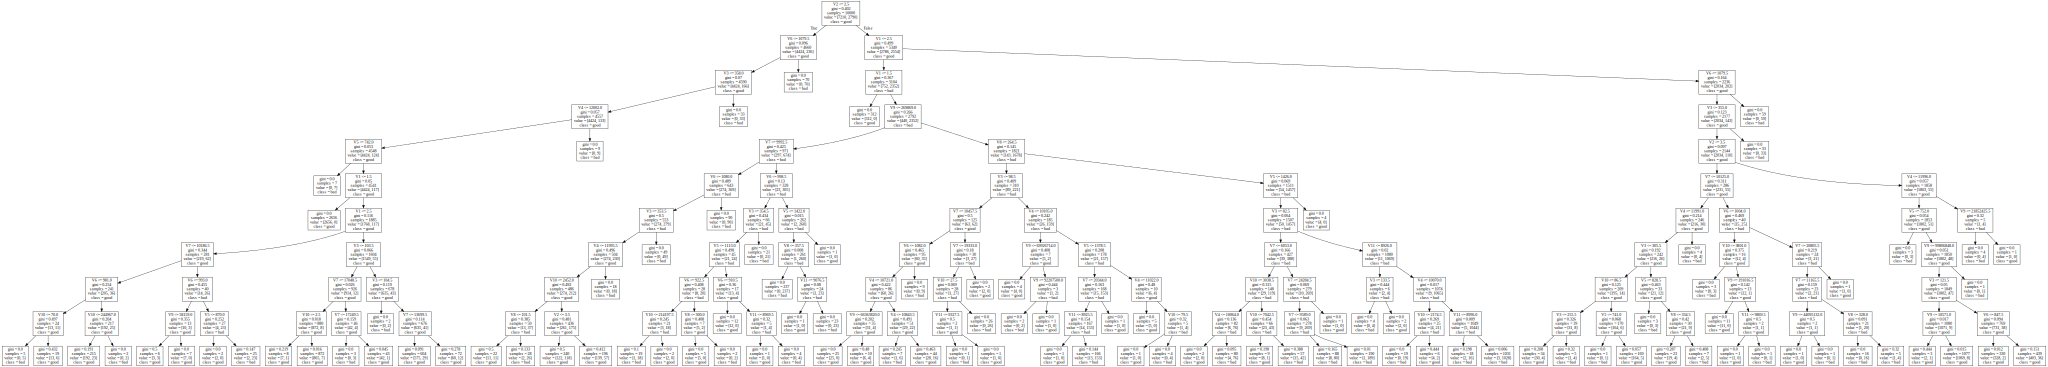

In [20]:
import graphviz 

dot_data = tree.export_graphviz(
    model
,   out_file=None
,   feature_names=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']
,   class_names=['good','bad']
)
graph = graphviz.Source(dot_data)
graph.render("decition-tree") 
graph

In [26]:

dfTestFeatures = dfTest[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']]
dfTestLabels = dfTest['STOP_YN']

dfTestLabelsPred = model.predict(dfTestFeatures)
dfTestLabelsPred

array([0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,

In [27]:

# conda install graphviz
# pip install graphviz
# download and install : graphviz-2.38.msi
# [download link] https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# [set path] C:\Apps\Graphviz2.38\bin




print("[Model Evaluation]\n")

print("[Number of Test Observations] {:,}".format(dfTestLabels.count()))
dfStatsFreq = pd.value_counts(dfTest['STOP_YN']).to_frame().reset_index()
print("[Frequence Table]\n",dfStatsFreq)



[Model Evaluation]

[Number of Test Observations] 10,000
[Frequence Table]
    index  STOP_YN
0    0.0     7183
1    1.0     2817


In [28]:
confusionMatrix = confusion_matrix(
    y_true=dfTestLabels
,   y_pred=dfTestLabelsPred)
print(confusionMatrix)



[[7045  138]
 [ 386 2431]]


In [29]:
true_negative, false_positive, false_negative, true_positive \
= confusion_matrix(
    y_true=dfTestLabels
,   y_pred=dfTestLabelsPred
    ).ravel()

accuracyRate = accuracy_score(
    y_true=dfTestLabels
,   y_pred=dfTestLabelsPred
)
print('정확도 = ',accuracyRate)
print('오분류율 = ', 1 - accuracyRate)




정확도 =  0.9476
오분류율 =  0.0524


In [30]:
importances = model.feature_importances_
sorted_importances = np.argsort(importances)
print(sorted_importances) #변수의 인덱스로 리턴


[10  7  9  4  3  8  6  2  5  1  0]


In [31]:

columnNames = dfTrain[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']].columns.values
print(columnNames)
print("변수 중요도")
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), columnNames), reverse=True))
padding = np.arange(len(columnNames)) + 0.5


['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11']
변수 중요도
[(0.4611, 'V1'), (0.2718, 'V2'), (0.0916, 'V6'), (0.057, 'V3'), (0.0366, 'V7'), (0.0228, 'V9'), (0.0175, 'V4'), (0.0134, 'V5'), (0.0131, 'V10'), (0.0127, 'V8'), (0.0026, 'V11')]


[ROC] 

fpr [0.         0.01921203 1.        ]
tpr [0.        0.8629748 1.       ]


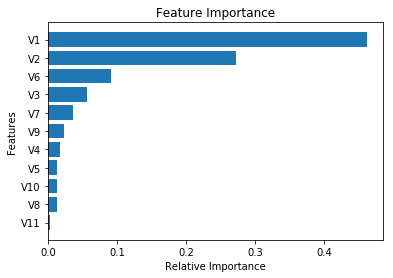

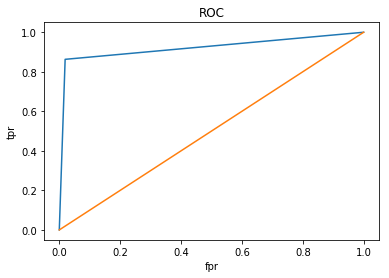

true_negative, false_positive, false_negative, true_positive
 7045 138 386 2431
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      7183
         1.0       0.95      0.86      0.90      2817

   micro avg       0.95      0.95      0.95     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.95      0.95      0.95     10000



In [32]:

plt.figure(1)
plt.barh(padding, importances[sorted_importances], align='center')
# plt.barh(padding, importances[sorted_importances])
plt.yticks(padding, columnNames[sorted_importances])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
# plt.show()

print("[ROC] \n")
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=dfTestLabels
,   y_score=dfTestLabelsPred
)
print("fpr",fpr)
print("tpr",tpr)
plt.figure(2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

print('true_negative, false_positive, false_negative, true_positive\n'
    , true_negative, false_positive, false_negative, true_positive)
print(classification_report(
    y_true=dfTestLabels
,   y_pred=dfTestLabelsPred
))